In [ ]:
#enables automatic reloading of Python modules that are imported into the notebook,
#so that any changes made to the module are automatically reloaded without having to restart the kernel.
%reload_ext autoreload
#display Matplotlib graphs and charts directly in the notebook, rather than in a separate window.
%matplotlib inline

In [ ]:
import pkg_resources
import pip
alreadyInstalledPackages = {pkg.key for pkg in pkg_resources.working_set}
requiredPackages = {"toad", "pickle"}
missing = requiredPackages - alreadyInstalledPackages
if missing:
	!pip install toad
	!pip install pickle


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 25.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [ ]:
import pandas as pd
from sklearn.metrics import roc_auc_score,roc_curve,auc,precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

import numpy as np
import glob
import math
import seaborn as sns
import matplotlib.pyplot as plt
import toad
import pickle

# Data preprocessing


In [ ]:
def data_split(df, start, end, date_column): #split data into traning and testing using date as splitter
  data = df[(df[date_column] >= start) & (df[date_column] < end)]
  data = data.reset_index(drop=True)
  return data

def target_info(df_target_column):
    proportion_true=str(round(sum(df_target_column == True) / len(df_target_column), 2) * 100)

    proportion_false=str(round(sum(df_target_column == False) / len(df_target_column), 3) * 100)

    print('There are total {} records in our data.'.format(len(df_target_column)))
    print('defaulted accounts:')
    print('Count: {}'.format(sum(df_target_column == True)))
    print('Proportion (default): {}'.format(proportion_true + '%'))
    print('not defaulted:')
    print('Count: {}'.format(sum(df_target_column == False)))
    print('Proportion (Not defaulted): {}'.format(proportion_false + '%'))
    plt.figure(figsize=(5, 5))
    sns.barplot(x=df_target_column.value_counts().index, y=df_target_column.value_counts())
    plt.title('Default rate')
    plt.ylabel('Count')
    return proportion_true



#Exploratory data analysis

In [ ]:
from io import StringIO
import urllib
import requests


url = "https://raw.githubusercontent.com/MohamedDerri/Machine-Deep-Learning-Enchantment-My-90-Day-Challenge-to-Master-the-Art-of-AI/master/Credit%20ScoreCard%20System/credit_card.csv"

r = requests.get(url)

data = pd.read_csv(StringIO(r.text))
data.shape
data.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
# plt.figure(figsize=(25, 12))
# sns.heatmap(data.corr(), annot=True)
# plt.show()

In [ ]:
data['label']=data['default.payment.next.month'] #rename the column default.payment.next.month
data=data.drop(columns=['default.payment.next.month'])

There are total 30000 records in our data.
defaulted accounts:
Count: 6636
Proportion (default): 22.0%
not defaulted:
Count: 23364
Proportion (Not defaulted): 77.9%


'22.0'

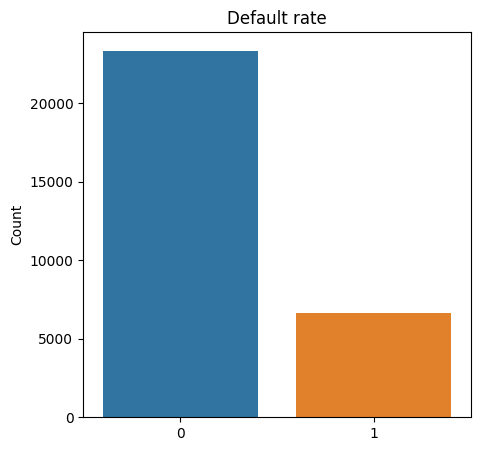

In [ ]:
'''The column "default payment next month" in your dataset is a binary variable that indicates whether a
credit card holder has defaulted on their payment for the next month or not. A binary variable is a categorical
variable that takes on one of two possible values, often represented as 0 or 1.

In the context of credit card payments, a value of 0 typically indicates that the credit
card holder has made the required payment for the next month, while a value of 1 indicates
that they have not made the required payment and are in default.

This variable is an important feature in credit risk analysis and modeling,
as it helps predict the likelihood of a borrower defaulting on their credit card payments
in the future. By analyzing the patterns and trends in this variable, credit card
companies and lenders can better understand the risk associated with a particular
borrower and make informed decisions regarding credit approvals, limits, and interest rates.'''

target_info(data['label'])

#Train and test split

 In some real-life projects, it may be more appropriate to split the data into training and testing sets based on the date or time, rather than doing a random split. This is especially true for time series data, where there is a natural temporal ordering of the data points.

If a random split is used on time series data, it can result in the training and testing sets having different time periods, which can cause overfitting and result in an overly optimistic evaluation of the model's performance. This is because the model may learn to make predictions based on patterns that occur in the training set but are not present in the testing set.

By splitting the data based on time, the training set will contain data from earlier time periods, while the testing set will contain data from later time periods. This more closely simulates how the model will be used in practice, where it will be trained on historical data and used to make predictions on future data. This approach can help ensure that the model's performance is more reflective of its ability to make accurate predictions on future data.

In [ ]:
# i will use the ID column to split the train-test data
train = data_split(data, start = 0, end=22500, date_column='ID')
test = data_split(data, start = 22500, end=172792, date_column='ID')


In [ ]:
train.label.value_counts()

0    17411
1     5088
Name: label, dtype: int64

In [ ]:
test.label.value_counts()

0    5953
1    1548
Name: label, dtype: int64

# Feature filtering

First, we need to perform feature filtering to drop the features that have low information value and high correlation.

Information Value (IV) is a measure of the predictive power of a feature in a binary classification problem. It is commonly used in credit risk modeling, fraud detection, and other applications where it is important to identify the factors that influence a binary outcome (e.g., default vs. non-default).

IV measures the degree of association between a feature and the target variable (i.e., the binary outcome) by calculating the difference between the distribution of the feature values for the positive and negative classes of the target variable. The resulting value represents the amount of information the feature provides in distinguishing between the two classes.

IV can be calculated using the following formula:

IV = sum((% of positive class - % of negative class) * WOE)

where:

% of positive class: the percentage of positive cases (i.e., cases where the target variable is 1) for a particular feature value
% of negative class: the percentage of negative cases (i.e., cases where the target variable is 0) for a particular feature value
WOE: Weight of Evidence, which is the natural logarithm of the ratio of % of positive class to % of negative class



In [ ]:
exclude_list = ['ID','label']
train_selected, drop_lst= toad.selection.select(frame = train,
                                                target=train['label'],
                                                empty = 0.7,
                                                iv = 0.02, corr = 1,
                                                return_drop=True,
                                                exclude=exclude_list)
print("keep:",train_selected.shape[1],
      "drop empty:",len(drop_lst['empty']),
      "drop iv:",len(drop_lst['iv']),
      "drop corr:",len(drop_lst['corr']))


keep: 23 drop empty: 0 drop iv: 2 drop corr: 0


In [ ]:
drop_lst

{'empty': array([], dtype=float64),
 'iv': array(['SEX', 'MARRIAGE'], dtype=object),
 'corr': array([], dtype=object)}

The function uses the toad.quality function from the toad package to calculate the information value (IV) for each feature in the train_selected dataset, with the iv_only=True argument specifying that only the IV values should be returned. The function then formats the resulting dataframe to include the names of the features along with their corresponding IV values.

In [ ]:
def output_iv_importance(train_selected,label_col):
    feat_import_iv = toad.quality(train_selected,label_col,iv_only=True)
    feat_import_iv=feat_import_iv['iv']
    feat_import_iv = feat_import_iv.reset_index()
    feat_import_iv.columns = ['name','iv']
    return feat_import_iv
df_iv=output_iv_importance(train_selected,'label')


In [ ]:
df_iv.head(30)

,name,iv
0,PAY_0,0.864707
1,PAY_2,0.536068
2,PAY_3,0.401513
3,PAY_4,0.349813
4,PAY_5,0.340014
5,PAY_6,0.282692
6,PAY_AMT1,0.189334
7,LIMIT_BAL,0.170973
8,PAY_AMT2,0.168256
9,PAY_AMT3,0.128827


This is the IV ranking for all the features. We can see that PAY_0 has the highest IV, which makes sense because this feature indicates the most recent repayment status. EDUCATION and AGE have a low IV compared to payment status and amount

#Feature binning

preprocessing to transform a continuous or numeric variable into a categorical variable. Binning involves dividing the range of the variable into a set of discrete intervals, or "bins", and assigning each observation to the corresponding bin based on the value of the variable.

There are different methods for binning a variable, including equal width binning, equal frequency binning, and custom binning. Equal width binning involves dividing the range of the variable into a specified number of equally sized bins. Equal frequency binning involves dividing the observations into a specified number of bins such that each bin contains approximately the same number of observations. Custom binning involves creating bins based on specific criteria or domain knowledge.

Binning can be useful for reducing the impact of outliers, dealing with missing values, simplifying complex relationships between variables, and improving the interpretability and accuracy of machine learning models. However, binning can also result in loss of information and may not always be appropriate or necessary, depending on the data and the modeling objectives.


The discretized features are very robust to abnormal data: for example, the value of a feature is 1 if age > 30, and 0 otherwise. If the features are not discretized, an abnormal data point “300 years old” will impact the model fitting

In [ ]:
#The toad library provides a Combiner class that can be used to perform
#feature binning. The first step is to initialize a Combiner object,
#which will be used to combine the values of the original features into new, binned features.

combiner = toad.transform.Combiner()
# use the filtered features for training
# Use the stable chi-square binning,
# specifying that each bin has at least 5% data to ensure stability
# empty values will be automatically assigned to the best bin
combiner.fit(X=train_selected,
             y=train_selected['label'],
             method='chi',
             min_samples = 0.05,
             exclude=exclude_list)

In [ ]:
bins = combiner.export()
len(bins)

21

In [ ]:
bins

{'LIMIT_BAL': [50000.0,
  60000.0,
  80000.0,
  110000.0,
  150000.0,
  230000.0,
  370000.0],
 'EDUCATION': [2],
 'AGE': [26, 29, 34, 46],
 'PAY_0': [-1, 0, 1, 2],
 'PAY_2': [-1, 2],
 'PAY_3': [-1, 0, 2],
 'PAY_4': [-1, 0, 1],
 'PAY_5': [-1, 0, 2],
 'PAY_6': [-1, 0, 2],
 'BILL_AMT1': [2501.0],
 'BILL_AMT2': [2400.0, 8287.0, 35213.0],
 'BILL_AMT3': [2400.0, 7458.0, 81890.0],
 'BILL_AMT4': [2501.0],
 'BILL_AMT5': [2395.0, 8110.0, 35288.0],
 'BILL_AMT6': [19195.0, 50442.0],
 'PAY_AMT1': [6.0, 4902.0],
 'PAY_AMT2': [92.0, 1603.0, 4520.0, 15002.0],
 'PAY_AMT3': [1.0, 2921.0],
 'PAY_AMT4': [1.0, 1506.0, 3946.0],
 'PAY_AMT5': [1.0, 1880.0, 10000.0],
 'PAY_AMT6': [28.0, 480.0, 926.0, 1078.0, 1501.0, 4060.0, 9567.0]}

In [ ]:
#apply binning
train_selected_bin = combiner.transform(train_selected)
test_bin = combiner.transform(test[train_selected_bin.columns])

In [ ]:
train_selected_bin.head()

,ID,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,label
0,1,0,1,0,4,2,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2,4,1,1,1,2,2,2,2,3,...,1,1,0,0,1,1,1,0,5,1
2,3,3,1,3,2,1,2,2,2,2,...,1,2,0,1,1,1,1,1,6,0
3,4,1,1,3,2,1,2,2,2,2,...,1,2,1,1,2,1,1,1,3,0
4,5,1,1,4,1,1,1,2,2,2,...,1,2,0,1,4,2,3,1,2,0


In [ ]:
test_bin.head()

,ID,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,label
0,22500,7,1,3,2,1,2,1,2,2,...,1,3,2,2,2,2,3,2,6,0
1,22501,5,1,2,1,1,1,1,1,1,...,1,0,0,0,1,2,2,2,5,0
2,22502,6,0,2,2,1,2,2,2,2,...,1,3,1,1,2,1,2,2,5,0
3,22503,1,1,3,2,1,3,3,3,2,...,1,2,1,1,2,0,0,1,2,1
4,22504,6,1,2,2,1,2,2,2,2,...,1,3,2,2,3,2,3,2,6,1


For numerical features, Toad's Combiner function uses a technique called "equal width binning". This involves dividing the range of values into a specified number of bins of equal width.

Once the initial binning is done, the resulting bins can be fine-tuned by examining the distribution of the target variable (in this case, label) within each bin. This can be done using various visualization techniques such as the bin_plot function from toad.plot. The badrate_plot function can also be used to visualize the relationship between the binned feature and the target variable.

Ideally, the distribution of the target variable (in this case, the label) should be as different as possible across different bins. This means that each bin should have a distinct and significant difference in the proportion of positive (1) and negative (0) cases in the target variable. For example, if we have a bin with a high proportion of positive cases compared to other bins, this could indicate that the feature in that bin is a strong predictor of the target variable. On the other hand, if the distribution of positive cases is similar across all bins, then the feature may not be a strong predictor.

<Axes: xlabel='PAY_AMT1', ylabel='prop'>

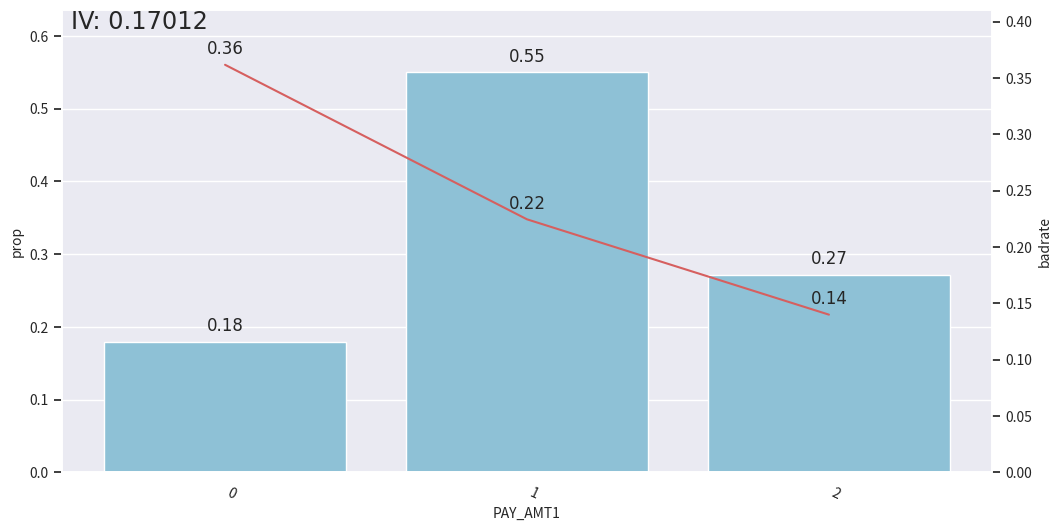

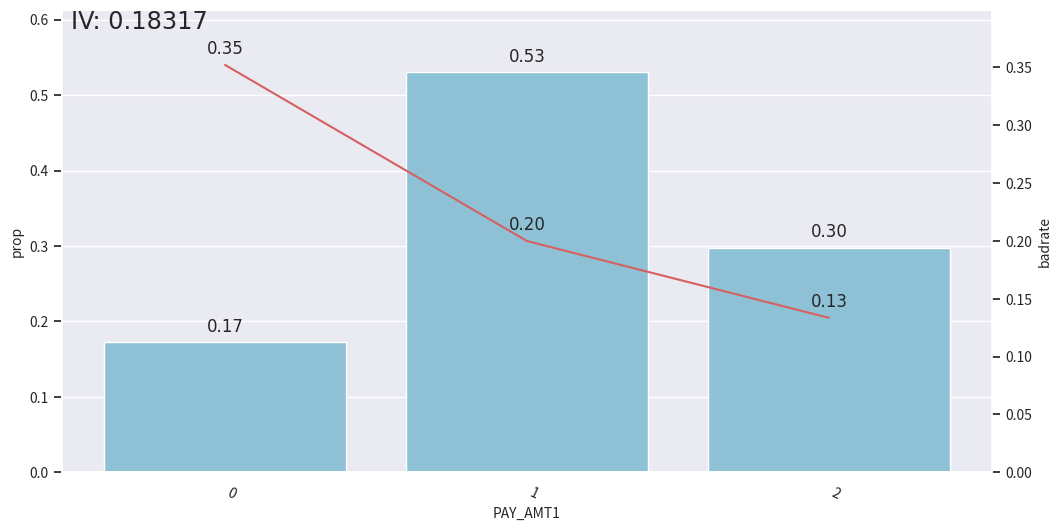

In [ ]:
from toad.plot import  bin_plot,badrate_plot
bin_plot(train_selected_bin,x='PAY_AMT1',target='label')
bin_plot(test_bin,x='PAY_AMT1',target='label')

In this plot, the bar plot represents the proportion of the data in the corresponding bin; the red line represents the proportion of default customers.
We need to make sure that the binning has monotonicity, which means the line is trending in the same direction with no sudden jump or drop.
This plot looks ok, if there is a sudden jump or drop, we need to use c.set_rules(dict) to combine the binning.
it should vary as the feature varies

we can adjust the binning by :
c.set_rules(rule)

#Compute the new WOE values for each bin

Binning is used to discretize continuous variables into a finite number of categories or bins, which can make it easier to interpret the relationship between the independent variables and the dependent variable. Once the variables are binned, we can calculate the WOE values for each bin. The WOE transformation maps the original values of a variable to the WOE values of the corresponding bin. So, we use the bins to calculate the WOE values for each category/bin of the variables.





In [ ]:
##transform to WOE
t=toad.transform.WOETransformer()
#transform training set
train_woe = t.fit_transform(X=train_selected_bin,
                            y=train_selected_bin['label'],
                            exclude=exclude_list)
#transform testing set
test_woe = t.transform(test_bin)

final_data_woe = pd.concat([train_woe,test_woe])

In [ ]:
final_data_woe.head()

,ID,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,label
0,1,0.666522,0.089338,0.260065,2.019269,1.459809,-0.417749,-0.383479,-0.146325,-0.117947,...,0.028510,-0.006521,-0.034304,0.662394,0.124160,0.488183,0.454327,0.370272,0.343887,1
1,2,-0.034630,0.089338,-0.100163,-0.308169,1.459809,-0.296556,-0.230510,-0.203587,1.282840,...,-0.009858,-0.239312,-0.034304,0.662394,0.124160,0.016060,0.056501,0.370272,-0.082401,1
2,3,0.108342,0.089338,-0.028816,-0.677822,-0.408118,-0.296556,-0.230510,-0.203587,-0.201216,...,-0.009858,0.140562,-0.034304,-0.009085,0.124160,0.016060,0.056501,0.084926,-0.391360,0
3,4,0.200392,0.089338,-0.028816,-0.677822,-0.408118,-0.296556,-0.230510,-0.203587,-0.201216,...,-0.009858,0.140562,0.162615,-0.009085,-0.076846,0.016060,0.056501,0.084926,-0.119586,0
4,5,0.200392,0.089338,0.156679,-0.308169,-0.408118,-0.417749,-0.230510,-0.203587,-0.201216,...,-0.009858,0.140562,-0.034304,-0.009085,-1.078550,-0.372758,-0.457199,0.084926,0.257636,0


#Compute the PSI (Population Stability Index)



In [ ]:
#get the feature name
features_list = [feat for feat in train_woe.columns if feat not in exclude_list]
#calculate PSI using toad
psi_df = toad.metrics.PSI(train_woe[features_list], test_woe[features_list]).sort_values(0)
#put into a dataframe
psi_df = psi_df.reset_index()
psi_df = psi_df.rename(columns = {'index' : 'feature',0:'psi'})

<ipython-input-27-b1c5be6aaa6d>:4: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  psi_df = toad.metrics.PSI(train_woe[features_list], test_woe[features_list]).sort_values(0)
